In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf 
from sklearn.metrics import classification_report
from tensorflow.keras import datasets, layers, models

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train=y_train.reshape(-1,)

In [8]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
def plotimg(x,y,idx):
  plt.figure(figsize=(15,2))
  plt.imshow(x[idx])
  plt.xlabel(classes[y[idx]])

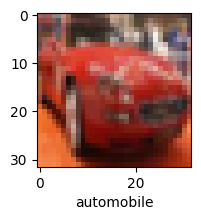

In [11]:
plotimg(x_train,y_train,5)

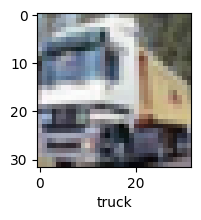

In [12]:
plotimg(x_train,y_train,1)

In [13]:
x_train=x_train/255.0
x_test=x_test/255.0

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

In [15]:
cnn=models.Sequential([
  #CNN Layers
  tf.keras.Input(shape=(32,32,3)),
  layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu"),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
  layers.MaxPooling2D((2,2)),
  #Dense Layers
  layers.Flatten(),
  layers.Dense(64,activation="relu"),
  layers.Dense(10,activation="softmax")
])

In [19]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [22]:
history=cnn.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3781 - loss: 1.7049
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5976 - loss: 1.1390
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6567 - loss: 0.9850
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6931 - loss: 0.8876
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7242 - loss: 0.8024
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7457 - loss: 0.7380
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7583 - loss: 0.6917
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7790 - loss: 0.6390
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7901 - loss: 0.5985
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8045 - loss: 0.5651


In [23]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
y_classes=[np.argmax(element) for element in y_pred]

In [28]:
print(classification_report(y_test,y_classes))

              precision    recall  f1-score   support

           0       0.83      0.65      0.73      1000
           1       0.84      0.80      0.82      1000
           2       0.66      0.49      0.56      1000
           3       0.58      0.47      0.52      1000
           4       0.48      0.80      0.60      1000
           5       0.66      0.57      0.61      1000
           6       0.83      0.70      0.76      1000
           7       0.70      0.76      0.73      1000
           8       0.81      0.80      0.81      1000
           9       0.69      0.86      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000

